### feature engineering
Based on the data analysis we will work on generating following features
- convert target variable into numerical variable
- bin age variable find right bins based on decision tree
- bin education num variable based on decision tree
- scale all numerical feature.
- fill missing values in categorical data with "missing"
- create rare lable for categorical variables.
- One hot encode categorical variables

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for finding optimum bins for discreetizing contineous variables
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score


# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# load dataset
data= pd.read_csv('E:/DataScience/Projects/adult_salary/data/raw/adult_data.txt',sep=',',header=None)
print(data.shape)
data.head()

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# add columns to the dataset
data.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
              'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

# add colum to index the class below <=50K as 1
data['class_idx']=data.apply(lambda x: 1 if (x['class']==' <=50K')else 0, axis =1)
# check the data sample

data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,class_idx
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


In [4]:
data['class']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: class, Length: 32561, dtype: object

### Seperate dataset into train and test

In [5]:
# split train data into train and test set
x_train,x_test,y_train,y_test =train_test_split (data,data['class_idx'],test_size=0.2,
                                                 random_state=0,stratify=data['class_idx'])
print(x_train.shape,x_test.shape)
print ('Percentage of positive case in train and test set.')
print('y_train: ',sum(y_train)/x_train.shape[0],"\ny_test: ",sum(y_test)/y_test.shape[0])

(26048, 16) (6513, 16)
Percentage of positive case in train and test set.
y_train:  0.7591753685503686 
y_test:  0.7592507293106096


In [6]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,class_idx
17639,51,State-gov,94174,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K,1
21173,43,Private,143368,HS-grad,9,Divorced,Farming-fishing,Not-in-family,Black,Male,0,0,40,United-States,<=50K,1
10143,35,?,164866,10th,6,Divorced,?,Not-in-family,White,Male,0,0,99,United-States,<=50K,1
29384,55,Private,189719,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
4719,39,Private,245361,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,25,United-States,<=50K,1


In [7]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,class_idx
13188,19,Private,265576,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,50,United-States,<=50K,1
26002,50,Federal-gov,184007,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,1
30093,60,Private,250552,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,>50K,0
22611,38,Private,111499,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K,0
9286,27,Private,401723,HS-grad,9,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K,1


#### Find bin size for age variable

In [8]:
# use decision tree to find optimal bin size for the age variable
clf = DecisionTreeClassifier( random_state=1,max_depth=4,min_impurity_split=.010,max_leaf_nodes=10)
clf.fit(x_train['age'].to_frame(),y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_impurity_split=0.01,
                       random_state=1)

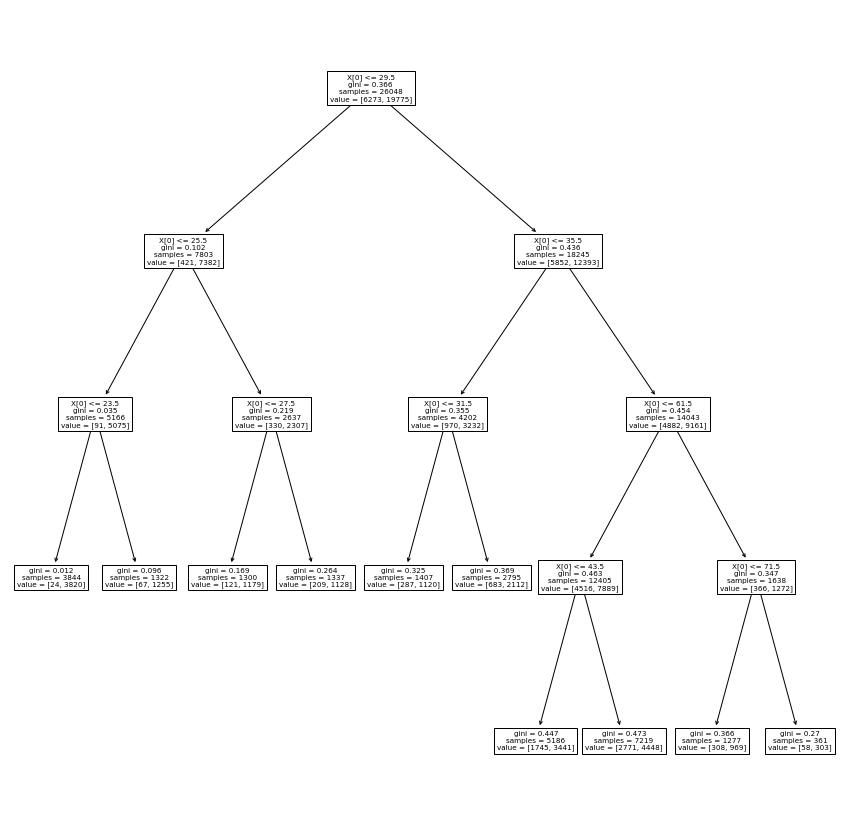

In [9]:
# visualize decision tree to identify best bin number and size for the age variable
plt.figure(figsize=(15,15))
plot_tree(clf)
plt.show()

Based on the decision tree, we will have a 7 age bin as follows:
<25, 25-30, 30-35, 35-45,45-60,60-70,>70


In [10]:
type(x_train)

pandas.core.frame.DataFrame

In [11]:
a=x_train.to_numpy()

In [12]:
a

array([[51, ' State-gov', 94174, ..., ' United-States', ' <=50K', 1],
       [43, ' Private', 143368, ..., ' United-States', ' <=50K', 1],
       [35, ' ?', 164866, ..., ' United-States', ' <=50K', 1],
       ...,
       [45, ' Local-gov', 326064, ..., ' United-States', ' <=50K', 1],
       [29, ' State-gov', 199450, ..., ' United-States', ' <=50K', 1],
       [21, ' Private', 187513, ..., ' United-States', ' <=50K', 1]],
      dtype=object)

In [13]:
# function to identify age groups
def get_age_group(age):
    if age<=25:
        return '<=25'
    elif age <=30: 
        return '25-30'
    elif age<=35:
        return '30-35'
    elif age <= 45:
        return'35-45'
    elif age <=60:
        return '45-60'
    elif age<=70:
        return '<=70'
    else:
        return '>70'
    

In [14]:
# create new variable age group for age variable for both train and test set
x_train['age_group']=x_train['age'].apply(lambda x: get_age_group(x))
x_test['age_group']=x_test['age'].apply(lambda x: get_age_group(x))

#### Find bin size for education num

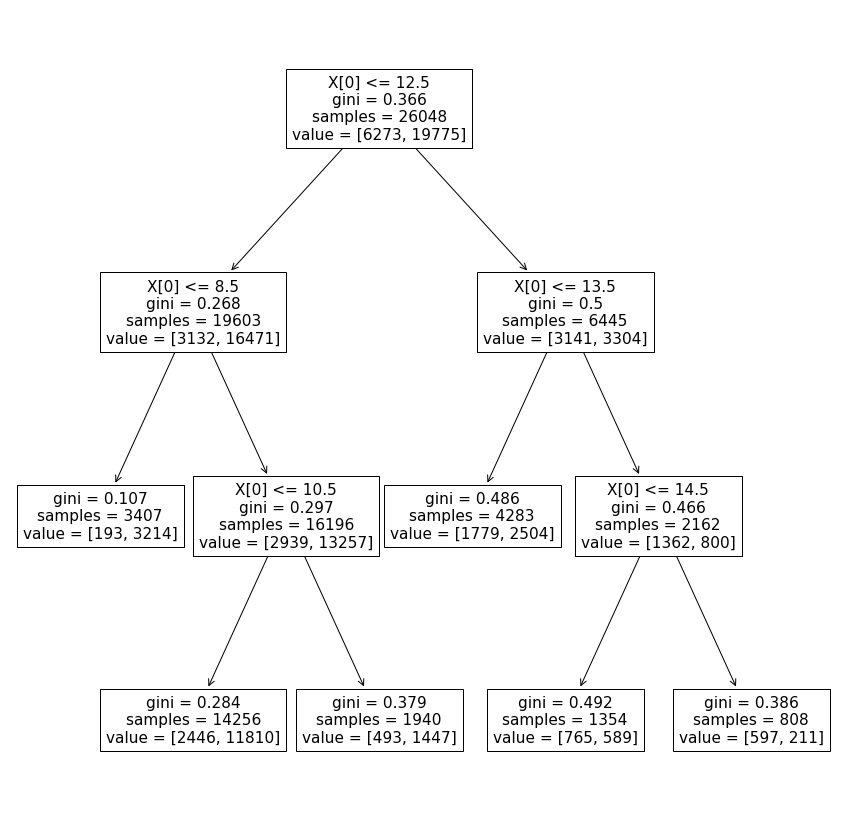

In [15]:
# use decision tree to find optimal bin size for the age variable
clf = DecisionTreeClassifier( random_state=1,max_depth=4,min_impurity_split=.10,max_leaf_nodes=6)
clf.fit(x_train['education-num'].to_frame(),y_train)
# visualize decision tree to identify best bin number and size for the age variable
plt.figure(figsize=(15,15))
plot_tree(clf)
plt.show()

Based on the decision tree we can work to make bin with <8.5, <12.5,<14.5, greater than 14.5 

In [16]:
# function to get groups for the education num
def get_education_group(edu):
    if edu<= 8.5:
        return '<=8.5'
    elif edu<=12.5:
        return '<=12.5'
    elif edu<=14.5:
        return '<=14.5'
    else: 
        return '>14.5'

In [17]:
# create new variable edu group for education-num variable for both train and test set
x_train['edu_group']=x_train['education-num'].apply(lambda x: get_education_group(x))
x_test['edu_group']=x_test['education-num'].apply(lambda x: get_education_group(x))

In [18]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,class_idx,age_group,edu_group
17639,51,State-gov,94174,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K,1,45-60,<=12.5
21173,43,Private,143368,HS-grad,9,Divorced,Farming-fishing,Not-in-family,Black,Male,0,0,40,United-States,<=50K,1,35-45,<=12.5
10143,35,?,164866,10th,6,Divorced,?,Not-in-family,White,Male,0,0,99,United-States,<=50K,1,30-35,<=8.5
29384,55,Private,189719,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0,45-60,<=14.5
4719,39,Private,245361,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,25,United-States,<=50K,1,35-45,<=14.5


#### scale numerical features
Capital loss and capital gain are the two numerical features that we need to scale

In [19]:
# use min max scalaer to fit on training dataset 
scaler=MinMaxScaler()
scaler.fit(x_train[['capital-loss','capital-gain','hours-per-week']])

MinMaxScaler()

In [20]:
# fit training and test data set the scaler
x_train[['capital-loss','capital-gain','hours-per-week']]=scaler.transform(x_train[['capital-loss','capital-gain','hours-per-week']])
x_test[['capital-loss','capital-gain','hours-per-week']]= scaler.transform(x_test[['capital-loss','capital-gain','hours-per-week']])

In [21]:
x_train.sample(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,class_idx,age_group,edu_group
20251,52,Private,138944,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K,0,45-60,<=8.5
15229,53,Federal-gov,170354,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K,0,45-60,<=12.5
16059,19,Private,301747,HS-grad,9,Separated,Adm-clerical,Own-child,White,Female,0.000000,0.0,0.295918,United-States,<=50K,1,<=25,<=12.5
25592,26,Private,284343,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0.000000,0.0,0.500000,United-States,<=50K,1,25-30,<=14.5
22222,45,Private,172960,Some-college,10,Divorced,Protective-serv,Not-in-family,White,Male,0.000000,0.0,0.704082,United-States,<=50K,1,35-45,<=12.5
2600,32,Private,195891,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.000000,0.0,0.551020,United-States,<=50K,1,30-35,<=14.5
8165,42,Private,185057,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.346939,Scotland,<=50K,1,35-45,<=12.5
25549,67,State-gov,239705,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0.000000,0.0,0.112245,?,<=50K,1,<=70,>14.5
26955,33,Private,199170,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0.000000,0.0,0.397959,United-States,<=50K,1,30-35,<=12.5
2145,25,Self-emp-not-inc,282631,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.000000,0.0,0.397959,United-States,<=50K,1,<=25,<=12.5


#### fill missing values in categorical data with "missing

In [22]:
x_train = x_train.replace(' ?', "missing")
x_test = x_test.replace(' ?', "missing")

#### find rare categories and classify them as rare

In [23]:
#let's capture the categorical variables in a list

cat_vars = [var for var in x_train.columns if x_train[var].dtype == 'O']

In [24]:
def find_frequent_labels(df, var,target, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the variables in the dataset

    df = df.copy()

    tmp = df.groupby(var)[target].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_vars:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(x_train, var,'class_idx', 0.01)
    
    # replace rare categories by the string "Rare"
    x_train[var] = np.where(x_train[var].isin(
        frequent_ls), x_train[var], 'Rare')
    
    x_test[var] = np.where(x_test[var].isin(
        frequent_ls), x_test[var], 'Rare')

#### one hot encoding of categorical variables

In [25]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [26]:
x_train.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'class_idx', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_Rare',
       'workclass_missing', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Prof-school', 'education_ Some-college', 'education_Rare',
       'marital-status_ Divorced', 'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'marital-status_Rare',
       'occupation_ Adm-clerical', 'occupation_ Craft-repair',
       'occupation_ Exec-man

In [27]:
var_to_drop=['age','fnlwgt','class_ <=50K','class_ >50K']

In [28]:
x_train=x_train.drop(var_to_drop,axis=1)
x_test=x_test.drop(var_to_drop,axis=1)

In [29]:
# export training and test dataset
x_train.to_csv('xtrain.csv',index=False)
x_test.to_csv('xtest.csv',index=False)